In [53]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import urllib.request
import ftplib
import matplotlib.patches as mpatches


from time import sleep
from tqdm import tqdm

In [2]:
ftp_server = ftplib.FTP("ftp.nasdaqtrader.com")
ftp_server.login()
ftp_server.encoding = "utf-8"
filenames = ["nasdaqlisted.txt", "otherlisted.txt"]
ftp_server.cwd("Symboldirectory")
ftp_server.dir()

for filename in filenames:
    with open(filename, "wb") as file:
        ftp_server.retrbinary(f"RETR {filename}", file.write)
        
ftp_server.quit

df_symbols_nasdaq = pd.read_csv("nasdaqlisted.txt", sep ="|")
df_symbols_nasdaq = df_symbols_nasdaq[df_symbols_nasdaq["ETF"] != "Y"]
df_symbols_nasdaq = df_symbols_nasdaq[df_symbols_nasdaq["Financial Status"] == "N"]
df_symbols_nasdaq.dropna(inplace = True)


df_symbols_other = pd.read_csv("otherlisted.txt", sep ="|")
df_symbols_other = df_symbols_other[df_symbols_other["ETF"] != "Y"]
df_symbols_other = df_symbols_other[df_symbols_other["Exchange"] != "N"]
df_symbols_other.dropna(inplace = True)
df_symbols_other

05-30-23  03:02AM                 6470 bondslist.txt
05-30-23  03:03AM             49003151 bxoptions.txt
05-26-23  10:01PM               161328 bxo_lmm.csv
05-30-23  03:03AM               909876 bxtraded.txt
05-28-23  04:17AM              5562617 gmniListedStrikesWithOptionIds.zip
05-28-23  04:16AM              5857805 iseListedStrikesWithOptionIds.zip
05-28-23  04:18AM              5587914 mcryListedStrikesWithOptionIds.zip
05-30-23  03:02AM              4508503 mfundslist.txt
05-30-23  03:02AM               217070 mpidlist.txt
05-30-23  03:02AM               330040 nasdaqlisted.txt
05-30-23  03:03AM               909884 nasdaqtraded.txt
05-30-23  03:02AM             57265327 options.txt
07-07-15  03:41PM                35264 otclist.txt
05-30-23  03:02AM               483271 otherlisted.txt
06-15-13  04:00AM                  251 pbot.csv
05-28-23  04:15AM              6130574 phlxListedStrikesWithOptionIds.zip
05-26-23  10:00PM               351590 phlxoptions.csv
03-12-21  10:32PM 

,ACT Symbol,Security Name,Exchange,CQS Symbol,ETF,Round Lot Size,Test Issue,NASDAQ Symbol
14,AAMC,Altisource Asset Management Corp Com,A,AAMC,N,100.0,N,AAMC
18,AAU,"Almaden Minerals, Ltd. Common Shares",A,AAU,N,100.0,N,AAU
33,ACAQ,Athena Consumer Acquisition Corp. Class A Comm...,A,ACAQ,N,100.0,N,ACAQ
34,ACAQ.U,"Athena Consumer Acquisition Corp. Units, each ...",A,ACAQ.U,N,100.0,N,ACAQ=
35,ACAQ.W,Athena Consumer Acquisition Corp. Redeemable w...,A,ACAQ.WS,N,100.0,N,ACAQ+
...,...,...,...,...,...,...,...,...
6201,ZIEXT,IEX Test Company Test Symbol One for IEX,V,ZIEXT,N,100.0,Y,ZIEXT
6206,ZOM,Zomedica Corp. Common Shares,A,ZOM,N,100.0,N,ZOM
6212,ZTEST,BATS BZX Exchange Common Stock (test issue),Z,ZTEST,N,100.0,Y,ZTEST
6218,ZVV,NYSE ARCA test stock,P,ZVV,N,100.0,Y,ZVV


In [61]:
ticker_list_nasdaq = list(df_symbols_nasdaq["Symbol"])
ticker_list_other = list(df_symbols_other["ACT Symbol"])
ticker_list = ticker_list_nasdaq + ticker_list_other
ticker_list = set(ticker_list)
print(len(ticker_list))

4396


In [ ]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_tickers = table[0]
tickers_sp = list(df_tickers["Symbol"])

table_nasdaq = pd.read_html('https://en.m.wikipedia.org/wiki/Nasdaq-100')
df_table_nasdaq = table_nasdaq[4]
tickers_nasdaq = list(df_table_nasdaq["Ticker"])
tickers_nasdaq

tickers = tickers_sp + tickers_nasdaq

In [6]:
fundamental_params = ["sector", "marketCap", "previousClose", "trailingPE", "forwardPE", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "priceToBook",
                      "pegRatio", "quickRatio", "debtToEquity", "returnOnAssets", "returnOnEquity", "earningsGrowth", "revenueGrowth", "operatingMargins"]

In [12]:
list_test = []

for i in tqdm(ticker_list):
  sublist_test = []
  ticker_info = yf.Ticker(i)
  sublist_test.append(i)
  for j in fundamental_params:
    try:
      sublist_test.append(ticker_info.info[j])
    except:
      continue
  list_test.append(sublist_test)

100%|██████████████████████████████████████████████████████████████████████████████| 4396/4396 [26:22<00:00,  2.78it/s]


In [13]:
fundamental_params.insert(0, "Ticker")

In [80]:
df_test = pd.DataFrame(list_test, columns = fundamental_params)
#df_test = df_test.set_index(df_test.columns[0])
#df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
#df_test.dropna(inplace = True)
df_test

,Ticker,sector,marketCap,previousClose,trailingPE,forwardPE,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToBook,pegRatio,quickRatio,debtToEquity,returnOnAssets,returnOnEquity,earningsGrowth,revenueGrowth,operatingMargins
0,LD,45.52,3.620000e+01,51.0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HRMY,Healthcare,2.131986e+09,35.99,11.697369,10.489676,29.810000,62.085000,4.811908,4.64400,43.82800,0.14105,0.57629,0.37100,0.396,0.28209,NaN
2,DCFC,Industrials,1.824223e+08,1.1,-4.958334,0.82,10.350000,0.726000,0.275000,-0.88153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FOXA,Communication Services,1.533912e+10,31.07,14.537036,9.968253,28.015000,37.260000,1.560326,0.93000,1.56500,78.59400,0.07841,0.10912,0.182,0.18680,NaN
4,PUYI,Financial Services,3.347466e+08,5.62,4.89,9.63,1.462065,2.129000,11.550000,-0.10073,-0.20742,-0.32600,-0.41067,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,BIOSW,0.1,8.000000e-02,0.1,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4392,COCO,Consumer Defensive,1.467519e+09,25.97,108.583336,28.955555,7.390000,26.820000,9.785955,0.36000,1.65800,0.02900,0.07035,0.08864,1.991,0.13800,0.05179
4393,PRLHW,0.0609,7.014200e-02,0.0927,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4394,PKBK,Financial Services,1.932976e+08,16.01,4.58357,14.86,25.490000,0.708934,0.021330,0.16698,0.10500,0.11200,0.71612,NaN,NaN,NaN,NaN


In [73]:
df_test2 = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticker            4396 non-null   object 
 1   sector            4317 non-null   object 
 2   marketCap         4315 non-null   float64
 3   previousClose     4315 non-null   object 
 4   trailingPE        3783 non-null   object 
 5   forwardPE         3751 non-null   object 
 6   fiftyTwoWeekLow   3709 non-null   float64
 7   fiftyTwoWeekHigh  3605 non-null   float64
 8   priceToBook       3475 non-null   float64
 9   pegRatio          3314 non-null   float64
 10  quickRatio        3178 non-null   float64
 11  debtToEquity      3030 non-null   float64
 12  returnOnAssets    2775 non-null   float64
 13  returnOnEquity    2239 non-null   float64
 14  earningsGrowth    1545 non-null   float64
 15  revenueGrowth     798 non-null    float64
 16  operatingMargins  508 non-null    float64


In [24]:
df_test["forwardPE"] = df_test["forwardPE"].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, LAMR to CSGP
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sector            508 non-null    object 
 1   marketCap         508 non-null    float64
 2   previousClose     508 non-null    object 
 3   trailingPE        508 non-null    object 
 4   forwardPE         508 non-null    float64
 5   fiftyTwoWeekLow   508 non-null    float64
 6   fiftyTwoWeekHigh  508 non-null    float64
 7   priceToBook       508 non-null    float64
 8   pegRatio          508 non-null    float64
 9   quickRatio        508 non-null    float64
 10  debtToEquity      508 non-null    float64
 11  returnOnAssets    508 non-null    float64
 12  returnOnEquity    508 non-null    float64
 13  earningsGrowth    508 non-null    float64
 14  revenueGrowth     508 non-null    float64
 15  operatingMargins  508 non-null    float64
dtypes: float64(13), object(3)
memory usage: 67.5+

In [81]:
fig = px.box(df_test["forwardPE"], y="forwardPE", width = (600), title = "PE Outliers" )
fig.show()

array([[<Axes: title={'center': 'priceToBook'}>,
        <Axes: title={'center': 'pegRatio'}>,
        <Axes: title={'center': 'quickRatio'}>],
       [<Axes: title={'center': 'debtToEquity'}>,
        <Axes: title={'center': 'returnOnAssets'}>,
        <Axes: title={'center': 'returnOnEquity'}>],
       [<Axes: title={'center': 'earningsGrowth'}>,
        <Axes: title={'center': 'revenueGrowth'}>,
        <Axes: title={'center': 'operatingMargins'}>]], dtype=object)

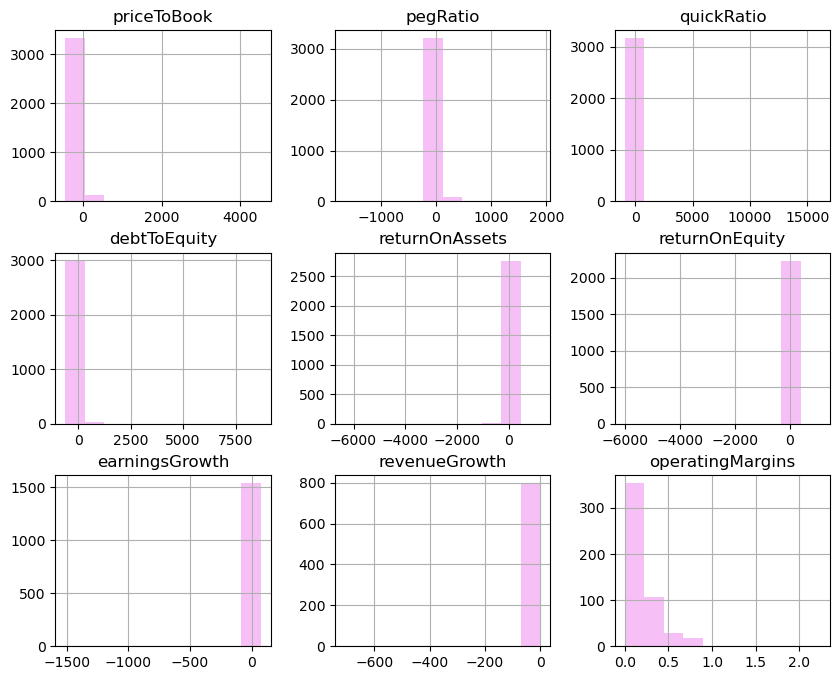

In [76]:
fundamental_params_histo = ["forwardPE", "priceToBook",
                      "pegRatio", "quickRatio", "debtToEquity", "returnOnAssets", "returnOnEquity", "earningsGrowth", "revenueGrowth", "operatingMargins"]

df_test[fundamental_params_histo].hist(color='violet', alpha=0.5, bins=10, figsize = (10,8))

In [30]:
df_test_new = df_test[(df_test.forwardPE < df_test.forwardPE.quantile(0.95)) & (df_test.forwardPE > df_test.forwardPE.quantile(0.05))]

In [78]:
fig = px.box(df_test_new["forwardPE"], y="forwardPE", height = (800), width = (600), title = "PE Box Plot")
fig.show()

In [82]:
plt.rcParams["figure.figsize"] = (12,9)

histogram, edges = np.histogram(df_test["forwardPE"], bins = 20 )
colors = np.array(["lightgreen", "lightgray"])[(edges[:-1] > 25).astype(int)]
plt.bar(edges[:-1], histogram, width=np.diff(edges), align="edge", color=colors)
plt.axvline(25, color = "red", linestyle = "dashed", linewidth = 1)
plt.title("Forward PE after removing Outliers")

green_patch = mpatches.Patch(color='lightgreen', label='Stocks selected')
gray_patch = mpatches.Patch(color='lightgray', label='Stocks not selected')
plt.legend(handles=[green_patch, gray_patch])

plt.xlabel("Forward PE")

TypeError: '<=' not supported between instances of 'NoneType' and 'float'

In [77]:
df_test_new = df_test
df_test_new = df_test_new[(df_test_new.quickRatio > 0.9) & (df_test_new.quickRatio < 10)]
df_test_new = df_test_new[(df_test_new.forwardPE < 25) & (df_test_new.forwardPE > 0)]
df_test_new = df_test_new[(df_test_new.priceToBook < 10) & (df_test_new.priceToBook > 0)]
df_test_new = df_test_new[(df_test_new.pegRatio < df_test_new.pegRatio.quantile(0.95)) & (df_test_new.pegRatio > df_test_new.pegRatio.quantile(0.01))]
df_test_new.describe()

,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToBook,pegRatio,quickRatio,debtToEquity,returnOnAssets,returnOnEquity,earningsGrowth,revenueGrowth,operatingMargins
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,369.000000,363.000000,357.000000,317.000000,237.000000
mean,1.627939e+10,36.301986,71.673261,2.407275,1.545056,2.535056,57.697712,0.070564,-0.588722,-0.632010,0.090104,0.205756
std,1.208303e+11,46.144866,196.243327,1.823425,2.700876,1.924096,85.631322,0.363271,14.196280,15.900716,0.239656,0.214562
min,1.117937e+07,0.320000,-1.070000,0.005410,-11.370000,0.903000,-1.710860,-1.430720,-269.733520,-291.090900,-0.550000,0.004210
25%,4.128419e+08,9.975000,13.275000,1.194551,0.480000,1.285000,1.377000,0.036040,0.064580,-0.268000,-0.030840,0.084460
50%,1.376394e+09,21.320000,34.100000,1.928199,1.130000,1.735000,28.117000,0.058180,0.134350,-0.004000,0.067000,0.152200
75%,4.276299e+09,46.355000,85.985000,3.155235,2.085000,2.868500,78.594000,0.096590,0.228585,0.240560,0.173000,0.244140
max,1.586996e+12,538.010000,3443.333300,9.083000,17.459000,9.855000,564.684000,5.916000,7.190000,51.844000,1.499000,2.241900


array([[<Axes: title={'center': 'forwardPE'}>,
        <Axes: title={'center': 'priceToBook'}>,
        <Axes: title={'center': 'pegRatio'}>],
       [<Axes: title={'center': 'quickRatio'}>,
        <Axes: title={'center': 'debtToEquity'}>,
        <Axes: title={'center': 'returnOnAssets'}>],
       [<Axes: title={'center': 'returnOnEquity'}>,
        <Axes: title={'center': 'earningsGrowth'}>,
        <Axes: title={'center': 'revenueGrowth'}>],
       [<Axes: title={'center': 'operatingMargins'}>, <Axes: >, <Axes: >]],
      dtype=object)

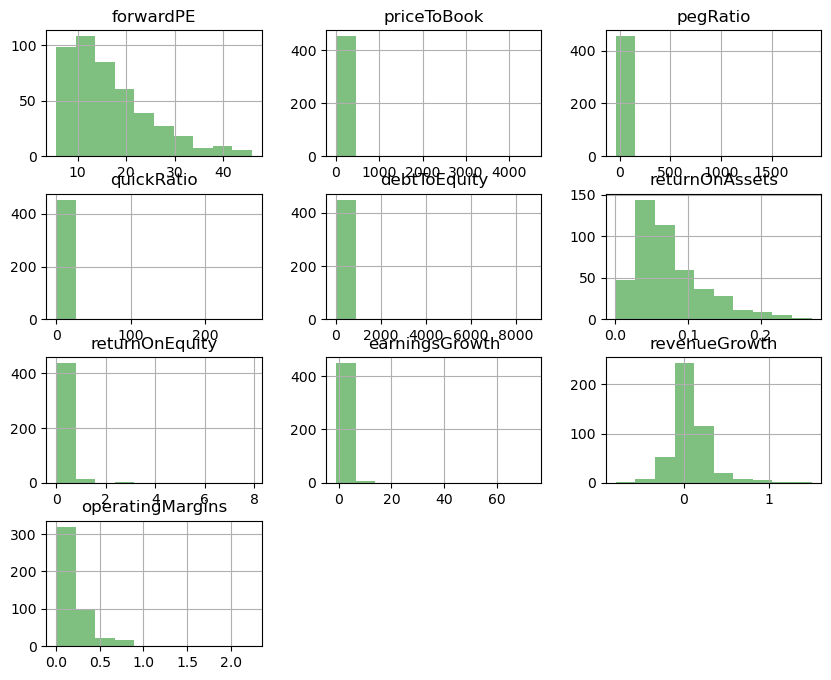

In [47]:
df_test_new[fundamental_params_histo].hist(color='green', alpha=0.5, bins=10, figsize = (10,8))

In [19]:
sector_list = ['Industrials','Technology',
       'Communication Services', 'Consumer Defensive',
       'Consumer Cyclical', 'Financial Services',  'Energy']

df_test_new = df_test_new[df_test_new['sector'].isin(sector_list)]
df_test_new.describe()

,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToBook,pegRatio,quickRatio,debtToEquity,returnOnAssets,returnOnEquity,earningsGrowth,revenueGrowth,operatingMargins
count,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,2.773457e+10,43.679085,74.432604,2.895275,0.887865,2.126359,70.464490,0.077162,0.191829,0.314349,0.083234,0.207629
std,1.687570e+11,40.246842,67.767567,1.918489,2.108944,1.494570,88.337314,0.042921,0.133145,1.387871,0.272086,0.227849
min,5.243361e+07,0.850000,1.569000,0.213785,-18.120000,0.903000,0.064000,0.001460,0.001320,-0.954000,-0.550000,0.004210
25%,6.561383e+08,14.885000,25.730000,1.428689,0.490000,1.225250,16.352250,0.048160,0.100083,-0.291500,-0.067000,0.084017
50%,2.079311e+09,26.240000,47.055000,2.452601,1.025000,1.577000,46.251500,0.068240,0.163765,-0.006000,0.039500,0.148565
75%,5.309459e+09,67.437500,107.332500,3.500754,1.740000,2.348250,94.943500,0.099150,0.240933,0.394500,0.182500,0.243712
max,1.586996e+12,192.190000,375.900000,8.884113,5.670000,8.524000,564.684000,0.255100,0.936410,9.548000,1.499000,2.241900


In [15]:
universe_list = list(df_test_new.index)

%store universe_list

Stored 'universe_list' (list)


In [60]:
universe_list

NameError: name 'universe_list' is not defined